In [440]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import json
import joblib
import pickle

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier


from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve, roc_auc_score

In [441]:


def get_metrics(y_test, y_pred):
    print(f"F1_SCORE: {f1_score(y_test, y_pred)}")
    print(f"RECALL: {recall_score(y_test, y_pred)}")
    print(f"PRECISION: {precision_score(y_test, y_pred)}")
    print(f"ROC AUC: {roc_auc_score(y_test, y_pred)}")


In [442]:
data = pd.read_csv("data/cleaned_data_add_features.csv")
#data = pd.read_csv("data/cleaned_data.csv")

#data = pd.read_csv("data/train_data.csv")
#data.readmitted = data.readmitted.replace(["Yes", "No"], [True, False])
#data[categorical_features] =  data[categorical_features].astype(str)
#data = data[~data["discharge_disposition_code"].isin(["11.0", "13.0", "14.0", "19.0", "20.0", "21.0"])]


data.head()

,Unnamed: 0,admission_id,patient_id,race,gender,age,weight,admission_type_code,discharge_disposition_code,admission_source_code,...,change,diabetesMed,readmitted,age_as_int,discharge_disposition_simplified,admission_source_simplified,medical_specialty_simplified,diag_1_simplified,diag_2_simplified,diag_3_simplified
0,0,0,199042938,Caucasian,Male,[50-60),NaN,3.0,1.0,1.0,...,No,Yes,False,50.0,Discharged to home,Physician Referral,Other,diseases of the musculoskeletal system and con...,"endocrine, nutritional and metabolic diseases,...",diseases of the nervous system and sense organs
1,1,1,91962954,Caucasian,Male,[80-90),NaN,2.0,1.0,7.0,...,No,No,True,80.0,Discharged to home,Emergency Room,Emergency/Trauma,"endocrine, nutritional and metabolic diseases,...",diseases of the respiratory system,neoplasms
2,2,2,109707084,Caucasian,Female,[60-70),NaN,1.0,1.0,7.0,...,Ch,Yes,False,60.0,Discharged to home,Emergency Room,Other,diseases of the circulatory system,diseases of the respiratory system,"endocrine, nutritional and metabolic diseases,..."
3,3,3,157495374,African American,Female,[70-80),NaN,NaN,1.0,NaN,...,No,Yes,False,70.0,Discharged to home,Other,Other,diseases of the digestive system,diseases of the genitourinary system,"endocrine, nutritional and metabolic diseases,..."
4,4,4,82692360,Caucasian,Female,NaN,NaN,1.0,22.0,7.0,...,No,No,False,NaN,Other,Emergency Room,Other,diseases of the digestive system,diseases of the digestive system,diseases of the digestive system


In [443]:

"""
data.age=data.age_as_int
data.discharge_disposition_code = data.discharge_disposition_simplified
data.admission_source_code = data.admission_source_simplified
data.medical_specialty = data.medical_specialty_simplified
data.diag_1 = data.diag_1_simplified
data.diag_2 = data.diag_2_simplified
data.diag_3 = data.diag_3_simplified
"""




'\ndata.age=data.age_as_int\ndata.discharge_disposition_code = data.discharge_disposition_simplified\ndata.admission_source_code = data.admission_source_simplified\ndata.medical_specialty = data.medical_specialty_simplified\ndata.diag_1 = data.diag_1_simplified\ndata.diag_2 = data.diag_2_simplified\ndata.diag_3 = data.diag_3_simplified\n'

In [444]:
data.columns[-7:]

Index(['age_as_int', 'discharge_disposition_simplified',
       'admission_source_simplified', 'medical_specialty_simplified',
       'diag_1_simplified', 'diag_2_simplified', 'diag_3_simplified'],
      dtype='object')

In [445]:
#dummy model: predicting everything as true
get_metrics(data.readmitted, [True]*len(data))

F1_SCORE: 0.20052163918482824
RECALL: 1.0
PRECISION: 0.1114332039502776
ROC AUC: 0.5


In [433]:
#shuffle target value
#data.readmitted = data.readmitted.sample(frac=1).reset_index(drop=True)

In [196]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler


Text(0, 0.5, 'Target value counts')

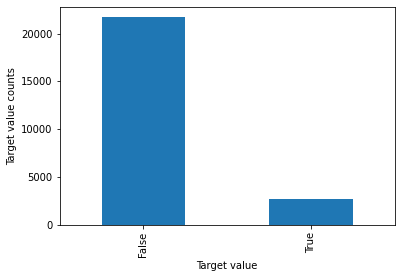

In [446]:
df_train, df_test = train_test_split(data, test_size=0.3, random_state=42)

df_test.readmitted.value_counts().plot(kind="bar")
plt.xlabel('Target value')
plt.ylabel('Target value counts')


In [518]:
# Write code to train and serialize a model in the block below
#
# Outputs expected: `columns.json`, `dtypes.pickle` and `pipeline.pickle`
#
# Your pipeline should be able to receive a dataframe with the columns we've requested you to use
# in the form `pipeline.predict(test_df)`
#

target = "readmitted"


all_features = ['race', 'gender',
       'admission_type_code', 'discharge_disposition_code',
       'admission_source_code', 'time_in_hospital', 'payer_code',
       'medical_specialty', 'has_prosthesis', 'complete_vaccination_status',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'blood_type',
       'hemoglobin_level', 'blood_transfusion', 'max_glu_serum', 'A1Cresult',
       'diuretics', 'insulin', 'change', 'diabetesMed', 'age_as_int',
       'diag_1_simplified', 'diag_2_simplified', 'diag_3_simplified']

numerical_features = ["time_in_hospital", "num_lab_procedures", "num_procedures", 'num_medications',  "number_outpatient", "number_emergency", 
        "number_inpatient", "number_diagnoses", "hemoglobin_level", 'age_as_int']

categorical_features = ['race', 'gender',
       'admission_type_code', 'discharge_disposition_code',
       'admission_source_code', 'payer_code',
       'medical_specialty', 'has_prosthesis', 'complete_vaccination_status', 'diag_1',
       'diag_2', 'diag_3', 'blood_type', 'blood_transfusion', 'max_glu_serum', 'A1Cresult',
       'diuretics', 'insulin', 'change', 'diabetesMed',
       'diag_1_simplified', 'diag_2_simplified', 'diag_3_simplified']



"""
all_features = ['race', 'gender',
    'time_in_hospital', 'has_prosthesis', 'complete_vaccination_status',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses', 'blood_type',
       'hemoglobin_level', 'blood_transfusion', 'max_glu_serum', 'A1Cresult',
       'diuretics', 'insulin', 'change', 'diabetesMed', 'age_as_int',
       'diag_1_simplified', 'diag_2_simplified', 'diag_3_simplified']

numerical_features = ["time_in_hospital", "num_lab_procedures", "num_procedures", 'num_medications', "number_outpatient", "number_emergency", 
        "number_inpatient", "number_diagnoses", "hemoglobin_level", 'age_as_int']

categorical_features = ['race', 'gender', 'has_prosthesis', 'complete_vaccination_status', 'blood_type', 'blood_transfusion', 'max_glu_serum', 'A1Cresult',
       'diuretics', 'insulin', 'change', 'diabetesMed',
       'diag_1_simplified', 'diag_2_simplified', 'diag_3_simplified']
"""

all_features = [
       'diag_1_simplified', 'diag_2_simplified', 'diag_3_simplified']

numerical_features = []

categorical_features = [
       'diag_1_simplified', 'diag_2_simplified', 'diag_3_simplified']



numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='nan')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])



pipeline = make_pipeline(
    preprocessor,
    LogisticRegression(random_state=42, n_jobs=-1),
    #RandomForestClassifier(max_depth=3, min_samples_leaf=.03, random_state=42, n_jobs=-1),
    #KNeighborsClassifier()
    #DecisionTreeClassifier(class_weight="balanced", max_depth=28, criterion = "entropy", min_samples_split=10)
    #GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)

)










In [519]:
X_train = df_train[all_features]
X_train[categorical_features] = X_train[categorical_features].astype(str)
y_train = df_train[target]

# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X_train, y_train)


# define undersampling strategy
undersample = RandomUnderSampler(sampling_strategy='majority')
# fit and apply the transform
X_under, y_under = undersample.fit_resample(X_train, y_train)


In [520]:
#pipeline.fit(X_train, y_train)
#pipeline.fit(X_over, y_over)
pipeline.fit(X_under, y_under)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  []),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='nan',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_un

In [521]:
#make predictions
X_test = df_test[all_features]
X_test[categorical_features] = X_test[categorical_features].astype(str)

y_test = df_test[target]

y_pred = pipeline.predict(X_test)
preds_proba = pipeline.predict_proba(X_test)[:, 1]

# To use on other cells
X_train_baseline = X_train.copy()
X_test_baseline = df_test.copy()
y_test_baseline = X_test_baseline[target].copy()
y_pred_baseline = y_pred.copy()
pipeline_baseline = pipeline

In [ ]:
"""
X_test_under, y_test_under = undersample.fit_resample(X_test, y_test)
y_pred = pipeline.predict(X_test_under)
get_metrics(y_test_under, y_pred)
"""


F1_SCORE: 0.5974831296735363
RECALL: 0.6004398826979472
PRECISION: 0.5945553539019963


In [522]:
get_metrics(y_test, y_pred)

F1_SCORE: 0.19870563971268046
RECALL: 0.5120967741935484
PRECISION: 0.1232683314215124
ROC AUC: 0.5270660862118185


In [502]:
get_metrics(y_test, y_pred)


F1_SCORE: 0.24794816414686827
RECALL: 0.5260263929618768
PRECISION: 0.1622018763422629
ROC AUC: 0.5921982997257761


In [497]:
# Create list of top most features based on importance
feature_names = X_train.columns
feature_imports = pipeline.steps[1][1].feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(10, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)
print(most_imp_features)
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Decision Tree')
plt.show()

AttributeError: 'LogisticRegression' object has no attribute 'feature_importances_'

                       Feature  Importance
2                          age    0.000000
3          admission_type_code    0.000000
0                         race    0.002747
1                       gender    0.004208
17                      diag_1    0.004920
22            hemoglobin_level    0.004965
6             time_in_hospital    0.014255
4   discharge_disposition_code    0.019667
33           diag_3_simplified    0.106128
5        admission_source_code    0.370177


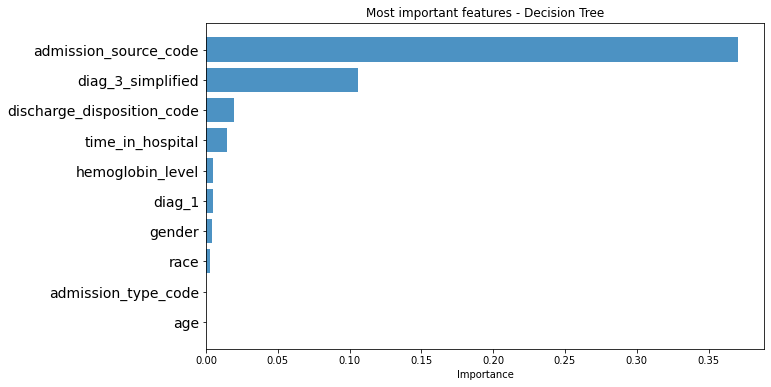

In [414]:
# Create list of top most features based on importance
feature_names = X_train.columns
feature_imports = pipeline.steps[1][1].feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(10, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)
print(most_imp_features)
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Decision Tree')
plt.show()

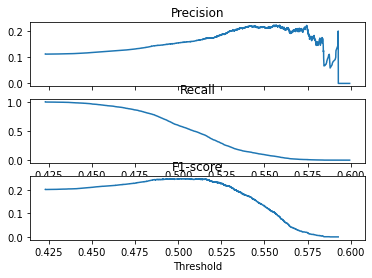

In [87]:
precision, recall, thresholds = precision_recall_curve(y_test, preds_proba)

precision = precision[:-1]
recall = recall[:-1]
f1_score_result = 2*precision*recall/(precision+recall)



fig=plt.figure()
ax1 = plt.subplot(311)
ax2 = plt.subplot(312)
ax3 = plt.subplot(313)

#ax1.hlines(y=0.5,xmin=0, xmax=1, colors='red')
ax1.plot(thresholds,precision)
ax2.plot(thresholds,recall)
ax3.plot(thresholds,f1_score_result)

ax1.get_shared_x_axes().join(ax1, ax2, ax3)
ax1.set_xticklabels([])
plt.xlabel('Threshold')
ax1.set_title('Precision')
ax2.set_title('Recall')
ax3.set_title('F1-score')

plt.show()

In [92]:
threshold = 0.5
best_preds = preds_proba>threshold
get_metrics(y_test, best_preds)



F1_SCORE: 0.24611223799864773
RECALL: 0.6004398826979472
PRECISION: 0.1547765283945951


In [54]:
# Save for deployment
with open(f'deployment/columns.json', 'w') as fh:
    json.dump(X_train_baseline.columns.tolist(), fh)
    
with open(f'deployment/dtypes.pickle', 'wb') as fh:
    pickle.dump(X_train_baseline.dtypes, fh)
    
joblib.dump(pipeline_baseline, f'deployment/pipeline.pickle')

['deployment/pipeline.pickle']